<a href="https://colab.research.google.com/github/arielmeragelman/analisis_volatilidad_precios/blob/main/convertir_sql_en_data_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyMySQL



In [ ]:
#DEFINO LOS DATOS PARA LA CONEXION CON LA BASE DE DATO DONDE SE GUARDA LA INFORMACION DEL SCRAPPING

import pymysql 
import pandas as pd


link=pymysql.connect(
   host="localhost",    
   user="laboratorio", 
   password="laboratorio",
   db="bd_1", 
   charset="utf8",
   port=3306
   )


#DEFINO LA CONSULTA PARA LEER LA INFORMACION DE LA BASE DE DATOS


def consulta_lineas(sql,link):
  
    cursor = link.cursor()
    cursor.execute(sql)
    print(cursor.rowcount, "LECTURA CORRECTA")
    salida=[]
    for row in cursor.fetchall():
        print(row)
        salida.append(row)
    cursor.close()
    return salida


In [ ]:

#EJECUTO UNA CONSULTA MODELO PARA EL ANALISIS DE DATOS
sql = """select distinct N_Producto,Precio_Origen,FECHA from entradas_super where N_Producto like "%QUESO%" and N_Super = "SUPER MAMI" order by N_Producto,Fecha ASC  """
#OBTENGO UNA LISTA CON LAS SALIDAS DE LA QUERY
tabla=consulta_lineas(sql,link)

1629 LECTURA CORRECTA
('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ', 102.96, datetime.date(2022, 4, 18))
('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ', 102.96, datetime.date(2022, 4, 19))
('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ', 102.96, datetime.date(2022, 4, 21))
('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ', 102.96, datetime.date(2022, 4, 22))
('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ', 102.96, datetime.date(2022, 4, 24))
('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ', 102.96, datetime.date(2022, 4, 25))
('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ', 102.96, datetime.date(2022, 4, 26))
('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ', 102.96, datetime.date(2022, 4, 27))
('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ', 102.96, datetime.date(2022, 4, 28))
('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ', 102.96, datetime.date(2022, 4, 30))
('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ', 102.96, datet

In [ ]:
tabla

[('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ',
  102.96,
  datetime.date(2022, 4, 18)),
 ('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ',
  102.96,
  datetime.date(2022, 4, 19)),
 ('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ',
  102.96,
  datetime.date(2022, 4, 21)),
 ('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ',
  102.96,
  datetime.date(2022, 4, 22)),
 ('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ',
  102.96,
  datetime.date(2022, 4, 24)),
 ('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ',
  102.96,
  datetime.date(2022, 4, 25)),
 ('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ',
  102.96,
  datetime.date(2022, 4, 26)),
 ('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ',
  102.96,
  datetime.date(2022, 4, 27)),
 ('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ',
  102.96,
  datetime.date(2022, 4, 28)),
 ('HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250 ',
  102.96,
  datetime.date(2022, 4, 30)),
 ('HARINA DE MAIZ PRESTOPRONTA

In [ ]:
# CONVIERTO LA LISTA EN UN DATAFRAME
a= pd.DataFrame(tabla)


# DEFINO DOS ARREGLOS UNIDIMENCIONALES CON LAS FECHAS Y LOS PRODUCTOS SIN QUE SE REPITAN
nuevas_columnas=a[0].unique()
fechas= a[2].unique()


# CREO UNA MATRIZ QUE OBTIENE LOS VALORES DE LA "tabla"  PERO LOS ORDENA PONIENDO CADA ELEMENTO DE FORMA UNICA E IRREPETIBLE SEGUN EL NOMBRE DEL PRODUCTO Y LA FECHA
# QUEDANDO LA FECHA COMO INDICE DE FILAS Y LOS PRODUCTOS COMO INDICE DE COLUMNAS

matriz_nueva=[]
for j,dia in enumerate(fechas):
    matriz_nueva.append([])
    for i,columna in enumerate(nuevas_columnas):
            try:
                valor=   float(a[ (a[0]==columna) & (a[2]==dia) ][1] )
            except TypeError:
                    valor=   0
            
            print("En la posicion i:"+str(i)+", j: "+str(j)+" Tenemos el valor: "+str(valor))
            matriz_nueva[j].append(valor)
            



En la posicion i:0, j: 0 Tenemos el valor: 102.96
En la posicion i:1, j: 0 Tenemos el valor: 61.36
En la posicion i:2, j: 0 Tenemos el valor: 366.76
En la posicion i:3, j: 0 Tenemos el valor: 155.9
En la posicion i:4, j: 0 Tenemos el valor: 205.82
En la posicion i:5, j: 0 Tenemos el valor: 155.9
En la posicion i:6, j: 0 Tenemos el valor: 155.9
En la posicion i:7, j: 0 Tenemos el valor: 205.82
En la posicion i:8, j: 0 Tenemos el valor: 155.9
En la posicion i:9, j: 0 Tenemos el valor: 0
En la posicion i:10, j: 0 Tenemos el valor: 1.0
En la posicion i:11, j: 0 Tenemos el valor: 1.0
En la posicion i:12, j: 0 Tenemos el valor: 302.54
En la posicion i:13, j: 0 Tenemos el valor: 1.0
En la posicion i:14, j: 0 Tenemos el valor: 1.0
En la posicion i:15, j: 0 Tenemos el valor: 0
En la posicion i:16, j: 0 Tenemos el valor: 810.9
En la posicion i:17, j: 0 Tenemos el valor: 737.9
En la posicion i:18, j: 0 Tenemos el valor: 0
En la posicion i:19, j: 0 Tenemos el valor: 787.9
En la posicion i:20, j: 0

In [ ]:
#CONVIERTO A LA MATRIZ EN UN DATAFRAME
matriz_nueva=pd.DataFrame(matriz_nueva)
#DEFINO EL NOMBRE DE LAS COLUMNAS
matriz_nueva.columns=nuevas_columnas
#DEFINO LOS INDICES DE FILAS
matriz_nueva.index=fechas
#DEFINO EL NOMBRE DEL INDICE DE FILA
matriz_nueva.index.name="fechas"

In [ ]:
print(matriz_nueva.head())
print("---"*10)
print(matriz_nueva.index)

            HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250   \
fechas                                                           
2022-04-18                                             102.96    
2022-04-19                                             102.96    
2022-04-21                                             102.96    
2022-04-22                                             102.96    
2022-04-24                                             102.96    

            HARINA DE MAIZ PRESTOPROTA PANCETA Y QUESO CON LEC  \
fechas                                                           
2022-04-18                                              61.36    
2022-04-19                                              61.36    
2022-04-21                                              61.36    
2022-04-22                                              61.36    
2022-04-24                                              61.36    

            PAPA MC CAIN  NOISETTE JAMON /QUESO X 500 GR  \
fechas        

In [ ]:
matriz_nueva.describe()

,HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250,HARINA DE MAIZ PRESTOPROTA PANCETA Y QUESO CON LEC,PAPA MC CAIN NOISETTE JAMON /QUESO X 500 GR,QUESO ADLER AZUL X 100 GR.,QUESO ADLER FONTINA RUEDA X 120 GR.,QUESO ADLER FONTINA X 100 GR.,QUESO ADLER GRUYERE X 100 GR.,QUESO ADLER JAMON RUEDA X 120 GR.,QUESO ADLER JAMON X 100 GR.,QUESO ADLER SALAME X 100 GR.,...,QUESO TREGAR AZUL HORMA X KG.,QUESO TREGAR CREMOSO HORMA X KG.,QUESO TREGAR CRIOLLO PORCIONADO X KG.,QUESO TREGAR FONTINA HORMA X KG.,QUESO TREGAR HOLANDA HORMA X KG.,QUESO TREGAR MOZZARELLA HORMA X KG.,QUESO TREGAR PATEGRAS HORMA X KG.,QUESO UNTABLE SANCOR POR SALUT LIGHT X 190 GR.,QUESO UNTABLE SANCOR POR SALUT X 190 GR.,RAVIOLES IL BAMBINO CUATRO QUESOS X 500 GR
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,96.525000,57.525000,312.053750,156.881250,200.889375,152.009375,122.778125,136.570625,38.975000,14.615625,...,0.937500,696.580000,0.906250,0.062500,156.687500,346.331250,0.062500,52.875000,47.000000,175.572187
std,25.321436,15.090552,98.881711,3.861175,37.130041,28.005418,66.118363,100.591683,68.586856,46.168940,...,0.245935,191.983889,0.296145,0.245935,368.273779,453.675896,0.245935,85.879041,82.708973,46.998656
min,0.000000,0.000000,0.000000,155.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,102.960000,61.360000,246.000000,155.900000,205.820000,155.900000,155.900000,0.000000,0.000000,0.000000,...,1.000000,679.040000,1.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000,179.000000
50%,102.960000,61.360000,366.760000,155.900000,205.820000,155.900000,155.900000,205.820000,0.000000,0.000000,...,1.000000,739.020000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,191.970000
75%,102.960000,61.360000,366.760000,155.900000,205.820000,155.900000,155.900000,205.820000,38.975000,0.000000,...,1.000000,799.000000,1.000000,0.000000,1.000000,922.800000,0.000000,188.000000,47.000000,191.970000
max,102.960000,61.360000,366.760000,171.600000,229.840000,171.600000,171.600000,229.840000,155.900000,155.900000,...,1.000000,799.000000,1.000000,1.000000,999.000000,922.800000,1.000000,188.000000,188.000000,191.970000


In [ ]:
# OBTENGO 2 DATAFRAME CON LOS VALORES HISTORICOS DEL DOLAR EN ARGENTINA

import requests
from bs4 import BeautifulSoup
import datetime
import pandas as pd

def scrap(año, mes, url):
    
    
    
    for i in range(1,7):
        try:        
            fecha = datetime.datetime(año,mes,i)
            data = {'fecha': fecha.strftime('%d-%m-%y')}
            resp = requests.post(url, data=data)
            soup = BeautifulSoup(resp.text, "html.parser")
            break
        except:
            print('Falló en ',i)    
    filas = soup.find_all('td', {'style' : 'padding: 1%'})
    return filas

def parsear(filas):
    mensual = pd.DataFrame() 
    for i in range(1, int(len(list(filas))/3)):
        dic = {}
        dic['fecha'] = filas[3*i].text
        dic['bid'] = filas[3*i+1].text
        dic['ask'] = filas[3*i+2].text
        rueda = pd.DataFrame.from_dict(dic, orient='index').transpose().set_index('fecha')
        rueda.index = pd.to_datetime(rueda.index, format='%d-%m-%y ')
        mensual = pd.concat([mensual,rueda], axis=0)
    return mensual

def downloadAño(año,url):
    tablaAnual = pd.DataFrame()
    for i in range(1,13):
        filas = scrap(año=año, mes=i,url=url)
        tabla = parsear(filas)
        tablaAnual = pd.concat([tablaAnual,tabla],axis=0)
        print('mes',i,'listo')        
    tablaAnual.to_excel('blue_'+str(año)+'.xlsx')
    print(tablaAnual)
    return tablaAnual


año=2022

dolar_blue= downloadAño(año,'https://www.cotizacion-dolar.com.ar/dolar-blue-historico-'+str(año)+'.php')
dolar_oficial= downloadAño(año,'https://www.cotizacion-dolar.com.ar/dolar-historico-bna-'+str(año)+'.php')

dolar=pd.merge(dolar_blue, dolar_oficial, on='fecha')

mes 1 listo
mes 2 listo
mes 3 listo
mes 4 listo
mes 5 listo
mes 6 listo
mes 7 listo
mes 8 listo
mes 9 listo
mes 10 listo
mes 11 listo
mes 12 listo
                   bid        ask
fecha                            
2022-01-03   $ 202.40    $ 206.00
2022-01-04   $ 202.90    $ 206.50
2022-01-05   $ 203.90    $ 207.50
2022-01-06   $ 204.90    $ 208.50
2022-01-07   $ 204.40    $ 208.00
...                ...        ...
2022-05-30   $ 203.40    $ 207.00
2022-05-31   $ 204.00    $ 207.00
2022-06-01   $ 202.40    $ 206.00
2022-06-02   $ 202.40    $ 206.00
2022-06-03   $ 201.40    $ 205.00

[63 rows x 2 columns]
mes 1 listo
mes 2 listo
mes 3 listo
mes 4 listo
mes 5 listo
mes 6 listo
mes 7 listo
mes 8 listo
mes 9 listo
mes 10 listo
mes 11 listo
mes 12 listo
                   bid        ask
fecha                            
2022-01-03   $ 102.00    $ 108.00
2022-01-04   $ 102.00    $ 108.00
2022-01-05   $ 102.00    $ 108.00
2022-01-06   $ 102.25    $ 108.25
2022-01-07   $ 102.50    $ 108.50
...

In [ ]:
# Cambio el formato del index de la matriz obtenida por web scrapping para que el indice sea en formato datetime y poder unirlo con la matriz del precio del dolar
matriz_nueva.index = pd.to_datetime(matriz_nueva.index)

matriz_con_dolar=pd.merge(matriz_nueva, dolar, left_index=True, right_index=True, how='left')


In [ ]:


matriz_con_dolar

,HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250,HARINA DE MAIZ PRESTOPROTA PANCETA Y QUESO CON LEC,PAPA MC CAIN NOISETTE JAMON /QUESO X 500 GR,QUESO ADLER AZUL X 100 GR.,QUESO ADLER FONTINA RUEDA X 120 GR.,QUESO ADLER FONTINA X 100 GR.,QUESO ADLER GRUYERE X 100 GR.,QUESO ADLER JAMON RUEDA X 120 GR.,QUESO ADLER JAMON X 100 GR.,QUESO ADLER SALAME X 100 GR.,...,QUESO TREGAR HOLANDA HORMA X KG.,QUESO TREGAR MOZZARELLA HORMA X KG.,QUESO TREGAR PATEGRAS HORMA X KG.,QUESO UNTABLE SANCOR POR SALUT LIGHT X 190 GR.,QUESO UNTABLE SANCOR POR SALUT X 190 GR.,RAVIOLES IL BAMBINO CUATRO QUESOS X 500 GR,bid_x,ask_x,bid_y,ask_y
fechas,,,,,,,,,,,,,,,,,,,,,
2022-04-18,102.96,61.36,366.76,155.9,205.82,155.9,155.9,205.82,155.9,0.0,...,1.0,922.8,0.0,0.0,0.0,191.97,NaN,NaN,NaN,NaN
2022-04-19,102.96,61.36,366.76,155.9,205.82,155.9,155.9,205.82,155.9,0.0,...,1.0,922.8,0.0,0.0,0.0,191.97,NaN,NaN,NaN,NaN
2022-04-21,102.96,61.36,366.76,155.9,205.82,155.9,0.0,0.00,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,191.97,NaN,NaN,NaN,NaN
2022-04-22,102.96,61.36,366.76,155.9,0.00,0.0,0.0,0.00,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,179.00,NaN,NaN,NaN,NaN
2022-04-24,102.96,61.36,366.76,155.9,205.82,155.9,0.0,0.00,0.0,0.0,...,1.0,922.8,0.0,0.0,0.0,179.00,NaN,NaN,NaN,NaN
2022-04-25,102.96,61.36,366.76,155.9,205.82,155.9,0.0,0.00,0.0,0.0,...,1.0,922.8,0.0,0.0,0.0,179.00,NaN,NaN,NaN,NaN
2022-04-26,102.96,61.36,366.76,155.9,205.82,155.9,155.9,0.00,0.0,0.0,...,1.0,922.8,0.0,0.0,0.0,179.00,NaN,NaN,NaN,NaN
2022-04-27,102.96,61.36,366.76,155.9,205.82,155.9,155.9,0.00,0.0,0.0,...,1.0,922.8,0.0,0.0,0.0,191.97,NaN,NaN,NaN,NaN
2022-04-28,102.96,61.36,366.76,155.9,205.82,155.9,155.9,205.82,0.0,0.0,...,1.0,922.8,0.0,0.0,0.0,191.97,NaN,NaN,NaN,NaN


In [ ]:
# COMENZAMOS CON LA LIMPIEZA DE VALORES IRRACIONALES
# CONVERTIMOS TODOS LOS PRECIOS INFERIORES A $2 EN NAN

for i in range(len(nuevas_columnas)):
   
    indice=nuevas_columnas[i]
    matriz_con_dolar.loc[  matriz_con_dolar[indice] < 2.0, indice    ] = np.nan
matriz_con_dolar



,HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250,HARINA DE MAIZ PRESTOPROTA PANCETA Y QUESO CON LEC,PAPA MC CAIN NOISETTE JAMON /QUESO X 500 GR,QUESO ADLER AZUL X 100 GR.,QUESO ADLER FONTINA RUEDA X 120 GR.,QUESO ADLER FONTINA X 100 GR.,QUESO ADLER GRUYERE X 100 GR.,QUESO ADLER JAMON RUEDA X 120 GR.,QUESO ADLER JAMON X 100 GR.,QUESO ADLER SALAME X 100 GR.,...,QUESO TREGAR HOLANDA HORMA X KG.,QUESO TREGAR MOZZARELLA HORMA X KG.,QUESO TREGAR PATEGRAS HORMA X KG.,QUESO UNTABLE SANCOR POR SALUT LIGHT X 190 GR.,QUESO UNTABLE SANCOR POR SALUT X 190 GR.,RAVIOLES IL BAMBINO CUATRO QUESOS X 500 GR,bid_x,ask_x,bid_y,ask_y
fechas,,,,,,,,,,,,,,,,,,,,,
2022-04-18,102.96,61.36,366.76,155.9,205.82,155.9,155.9,205.82,155.9,NaN,...,NaN,922.8,NaN,NaN,NaN,191.97,NaN,NaN,NaN,NaN
2022-04-19,102.96,61.36,366.76,155.9,205.82,155.9,155.9,205.82,155.9,NaN,...,NaN,922.8,NaN,NaN,NaN,191.97,NaN,NaN,NaN,NaN
2022-04-21,102.96,61.36,366.76,155.9,205.82,155.9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,191.97,NaN,NaN,NaN,NaN
2022-04-22,102.96,61.36,366.76,155.9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,179.00,NaN,NaN,NaN,NaN
2022-04-24,102.96,61.36,366.76,155.9,205.82,155.9,NaN,NaN,NaN,NaN,...,NaN,922.8,NaN,NaN,NaN,179.00,NaN,NaN,NaN,NaN
2022-04-25,102.96,61.36,366.76,155.9,205.82,155.9,NaN,NaN,NaN,NaN,...,NaN,922.8,NaN,NaN,NaN,179.00,NaN,NaN,NaN,NaN
2022-04-26,102.96,61.36,366.76,155.9,205.82,155.9,155.9,NaN,NaN,NaN,...,NaN,922.8,NaN,NaN,NaN,179.00,NaN,NaN,NaN,NaN
2022-04-27,102.96,61.36,366.76,155.9,205.82,155.9,155.9,NaN,NaN,NaN,...,NaN,922.8,NaN,NaN,NaN,191.97,NaN,NaN,NaN,NaN
2022-04-28,102.96,61.36,366.76,155.9,205.82,155.9,155.9,205.82,NaN,NaN,...,NaN,922.8,NaN,NaN,NaN,191.97,NaN,NaN,NaN,NaN


In [ ]:
# COMPLETAMOS CON DATOS LOS CAMPOS VACIOS
matriz_con_dolar=matriz_con_dolar.fillna(method="ffill")
matriz_con_dolar=matriz_con_dolar.fillna(method="backfill")
matriz_con_dolar

,HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250,HARINA DE MAIZ PRESTOPROTA PANCETA Y QUESO CON LEC,PAPA MC CAIN NOISETTE JAMON /QUESO X 500 GR,QUESO ADLER AZUL X 100 GR.,QUESO ADLER FONTINA RUEDA X 120 GR.,QUESO ADLER FONTINA X 100 GR.,QUESO ADLER GRUYERE X 100 GR.,QUESO ADLER JAMON RUEDA X 120 GR.,QUESO ADLER JAMON X 100 GR.,QUESO ADLER SALAME X 100 GR.,...,QUESO TREGAR HOLANDA HORMA X KG.,QUESO TREGAR MOZZARELLA HORMA X KG.,QUESO TREGAR PATEGRAS HORMA X KG.,QUESO UNTABLE SANCOR POR SALUT LIGHT X 190 GR.,QUESO UNTABLE SANCOR POR SALUT X 190 GR.,RAVIOLES IL BAMBINO CUATRO QUESOS X 500 GR,bid_x,ask_x,bid_y,ask_y
fechas,,,,,,,,,,,,,,,,,,,,,
2022-04-18,102.96,61.36,366.76,155.9,205.82,155.9,155.9,205.82,155.9,155.9,...,999.0,922.8,NaN,188.0,188.0,191.97,$ 197.40,$ 201.00,$ 114.50,$ 120.50
2022-04-19,102.96,61.36,366.76,155.9,205.82,155.9,155.9,205.82,155.9,155.9,...,999.0,922.8,NaN,188.0,188.0,191.97,$ 197.40,$ 201.00,$ 114.50,$ 120.50
2022-04-21,102.96,61.36,366.76,155.9,205.82,155.9,155.9,205.82,155.9,155.9,...,999.0,922.8,NaN,188.0,188.0,191.97,$ 197.40,$ 201.00,$ 114.50,$ 120.50
2022-04-22,102.96,61.36,366.76,155.9,205.82,155.9,155.9,205.82,155.9,155.9,...,999.0,922.8,NaN,188.0,188.0,179.00,$ 197.40,$ 201.00,$ 114.50,$ 120.50
2022-04-24,102.96,61.36,366.76,155.9,205.82,155.9,155.9,205.82,155.9,155.9,...,999.0,922.8,NaN,188.0,188.0,179.00,$ 197.40,$ 201.00,$ 114.50,$ 120.50
2022-04-25,102.96,61.36,366.76,155.9,205.82,155.9,155.9,205.82,155.9,155.9,...,999.0,922.8,NaN,188.0,188.0,179.00,$ 197.40,$ 201.00,$ 114.50,$ 120.50
2022-04-26,102.96,61.36,366.76,155.9,205.82,155.9,155.9,205.82,155.9,155.9,...,999.0,922.8,NaN,188.0,188.0,179.00,$ 197.40,$ 201.00,$ 114.50,$ 120.50
2022-04-27,102.96,61.36,366.76,155.9,205.82,155.9,155.9,205.82,155.9,155.9,...,999.0,922.8,NaN,188.0,188.0,191.97,$ 197.40,$ 201.00,$ 114.50,$ 120.50
2022-04-28,102.96,61.36,366.76,155.9,205.82,155.9,155.9,205.82,155.9,155.9,...,999.0,922.8,NaN,188.0,188.0,191.97,$ 197.40,$ 201.00,$ 114.50,$ 120.50


In [ ]:
# ELIMINAMOS LAS COLUMNAS QUE ESTEN COMPLETAMENTE INUTILIZABLES
for v,i in enumerate(nuevas_columnas):
    if matriz_con_dolar[i].isna().all() :
        del matriz_con_dolar[i]
        

In [ ]:
#VEMOS LA MATRIZ YA REDUCIDA
matriz_con_dolar

,HARINA DE MAIZ PRESTOPRONTA PANCETA Y QUESO X 250,HARINA DE MAIZ PRESTOPROTA PANCETA Y QUESO CON LEC,PAPA MC CAIN NOISETTE JAMON /QUESO X 500 GR,QUESO ADLER AZUL X 100 GR.,QUESO ADLER FONTINA RUEDA X 120 GR.,QUESO ADLER FONTINA X 100 GR.,QUESO ADLER GRUYERE X 100 GR.,QUESO ADLER JAMON RUEDA X 120 GR.,QUESO ADLER JAMON X 100 GR.,QUESO ADLER SALAME X 100 GR.,...,QUESO TREGAR CREMOSO HORMA X KG.,QUESO TREGAR HOLANDA HORMA X KG.,QUESO TREGAR MOZZARELLA HORMA X KG.,QUESO UNTABLE SANCOR POR SALUT LIGHT X 190 GR.,QUESO UNTABLE SANCOR POR SALUT X 190 GR.,RAVIOLES IL BAMBINO CUATRO QUESOS X 500 GR,bid_x,ask_x,bid_y,ask_y
fechas,,,,,,,,,,,,,,,,,,,,,
2022-04-12,102.96,61.36,229.00,155.9,205.82,155.9,155.9,205.82,155.9,155.9,...,799.00,999.0,922.8,188.0,188.0,191.97,$ 201.40,$ 205.00,$ 120.00,$ 126.00
2022-04-13,102.96,61.36,229.00,155.9,205.82,155.9,155.9,205.82,155.9,155.9,...,799.00,999.0,922.8,188.0,188.0,191.97,$ 201.40,$ 205.00,$ 120.00,$ 126.00
2022-04-18,102.96,61.36,366.76,155.9,205.82,155.9,155.9,205.82,155.9,155.9,...,679.04,999.0,922.8,188.0,188.0,191.97,$ 197.40,$ 201.00,$ 114.50,$ 120.50
2022-04-19,102.96,61.36,366.76,155.9,205.82,155.9,155.9,205.82,155.9,155.9,...,679.04,999.0,922.8,188.0,188.0,191.97,$ 197.40,$ 201.00,$ 114.50,$ 120.50
2022-04-21,102.96,61.36,366.76,155.9,205.82,155.9,155.9,205.82,155.9,155.9,...,679.04,999.0,922.8,188.0,188.0,191.97,$ 197.40,$ 201.00,$ 114.50,$ 120.50
2022-04-22,102.96,61.36,366.76,155.9,205.82,155.9,155.9,205.82,155.9,155.9,...,679.04,999.0,922.8,188.0,188.0,179.00,$ 197.40,$ 201.00,$ 114.50,$ 120.50
2022-04-24,102.96,61.36,366.76,155.9,205.82,155.9,155.9,205.82,155.9,155.9,...,679.04,999.0,922.8,188.0,188.0,179.00,$ 197.40,$ 201.00,$ 114.50,$ 120.50
2022-04-25,102.96,61.36,366.76,155.9,205.82,155.9,155.9,205.82,155.9,155.9,...,679.04,999.0,922.8,188.0,188.0,179.00,$ 197.40,$ 201.00,$ 114.50,$ 120.50
2022-04-26,102.96,61.36,366.76,155.9,205.82,155.9,155.9,205.82,155.9,155.9,...,679.04,999.0,922.8,188.0,188.0,179.00,$ 197.40,$ 201.00,$ 114.50,$ 120.50


In [ ]:
# DEFINIMOS EL NUEVO ARREGLO DE COLUMNAS  CONSIDERANDO QUE HEMOS QUITADO ALGUNAS DE SU ARREGLO ORIGINAL

nuevas_columnas=matriz_con_dolar.columns

matriz_con_dolar=matriz_con_dolar.sort_index()

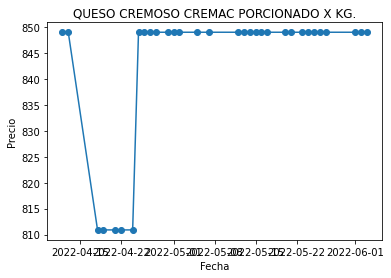

In [ ]:
# Import Library

import matplotlib.pyplot as plt

# Plot

indice=nuevas_columnas[11]
plt.plot(matriz_con_dolar[indice], marker='o')

# Labelling 

plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.title(indice)

# Display

plt.show()

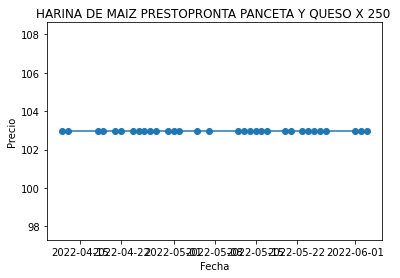

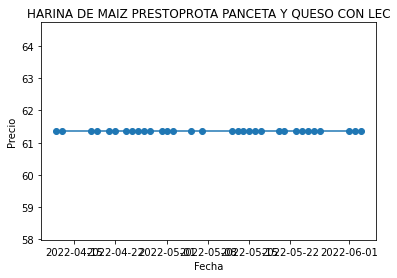

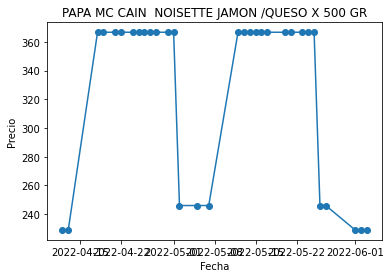

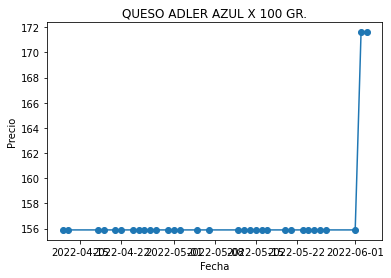

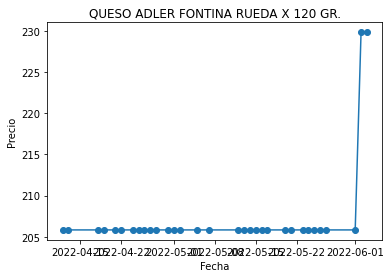

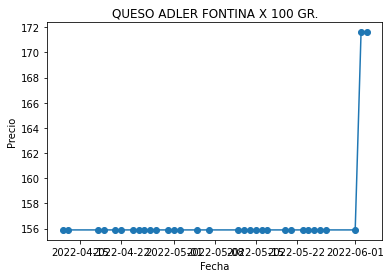

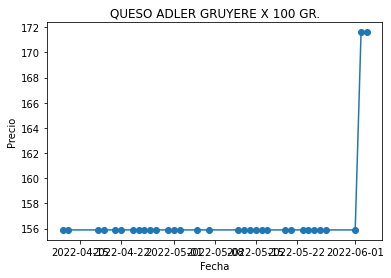

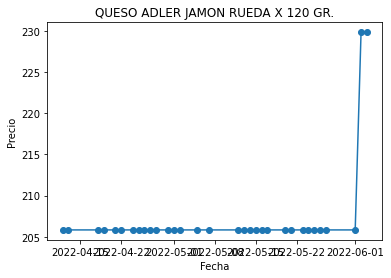

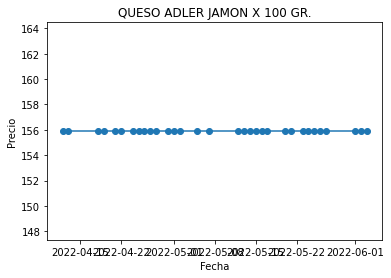

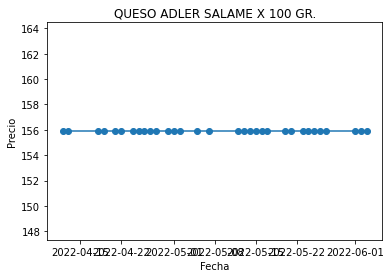

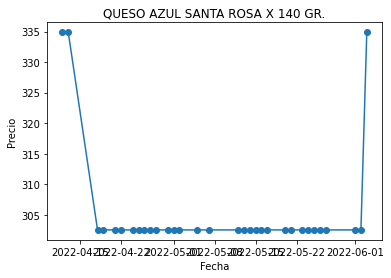

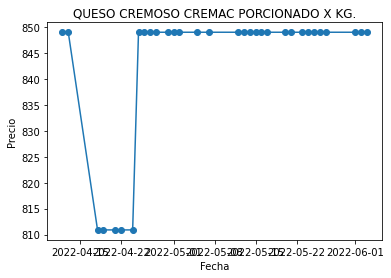

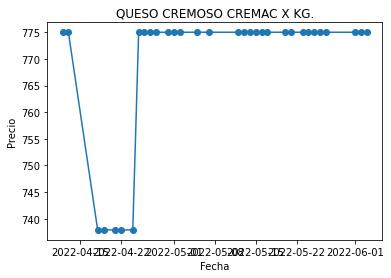

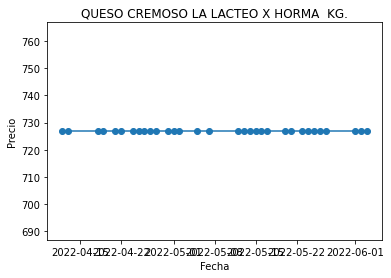

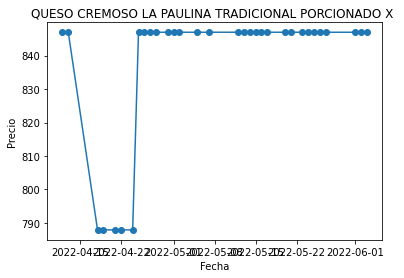

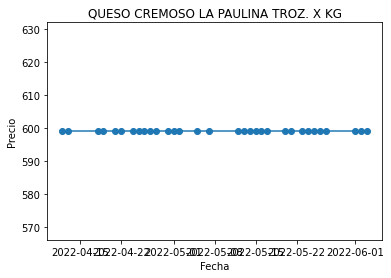

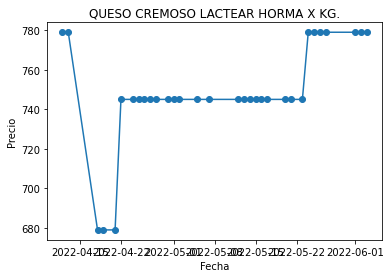

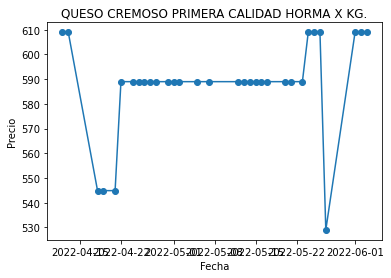

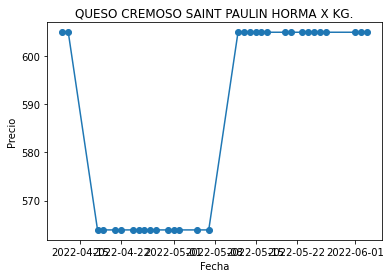

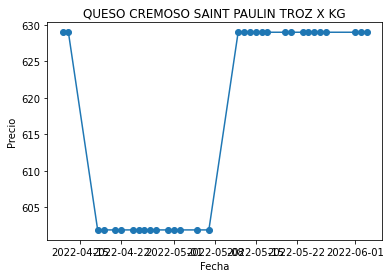

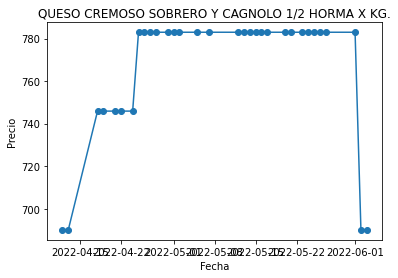

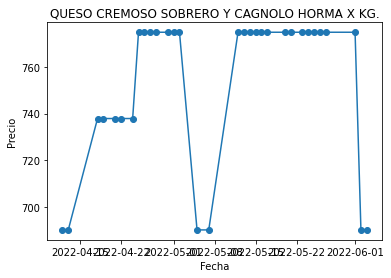

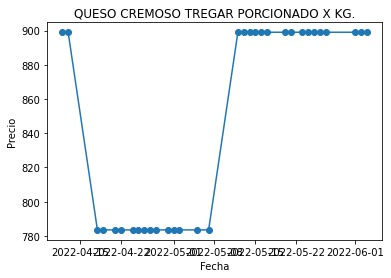

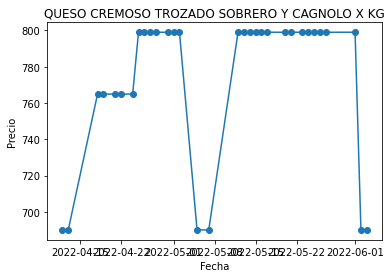

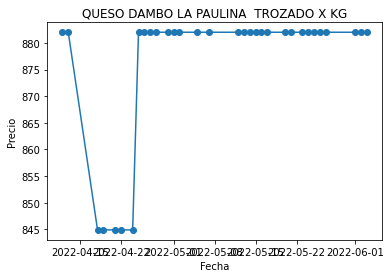

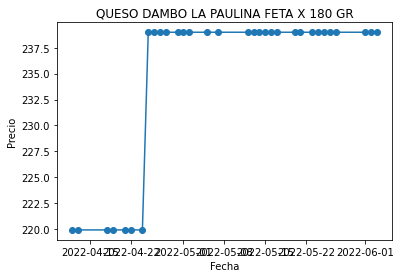

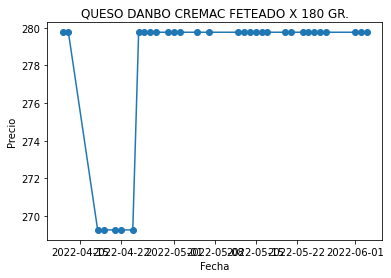

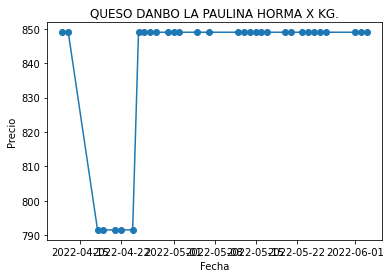

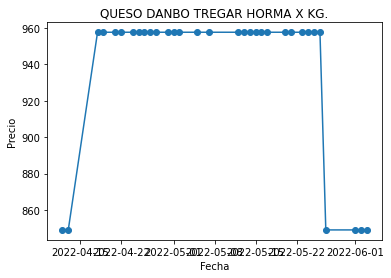

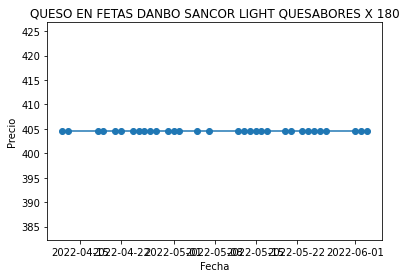

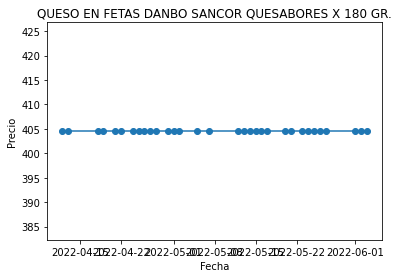

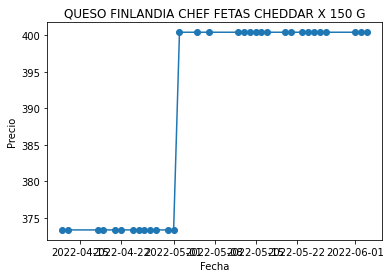

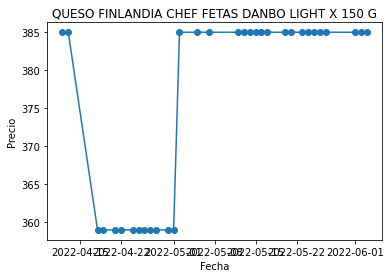

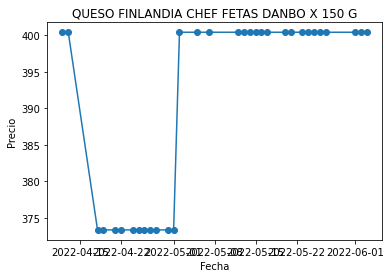

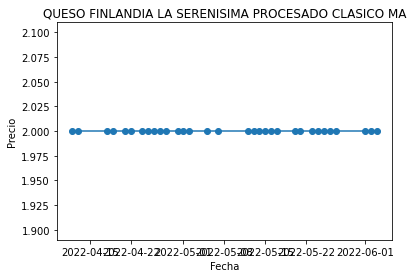

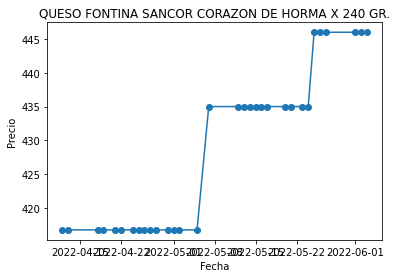

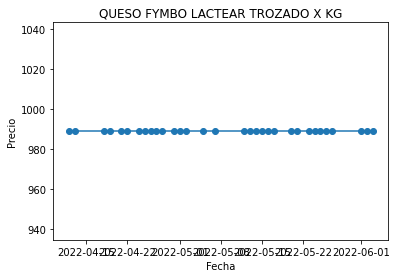

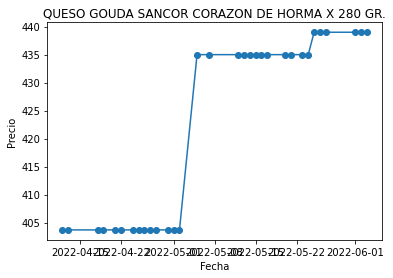

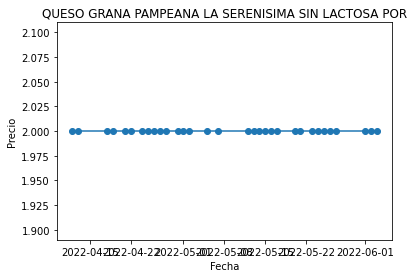

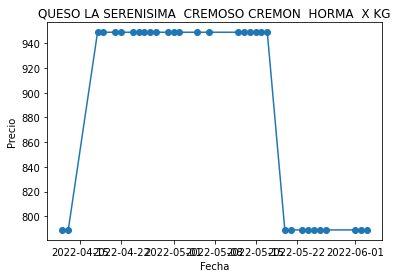

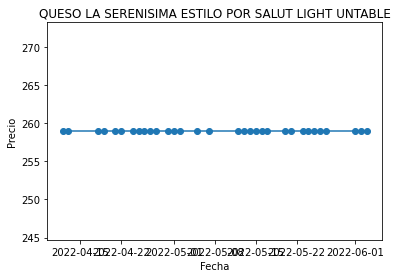

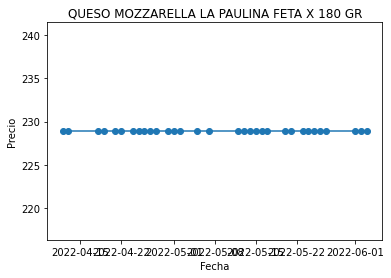

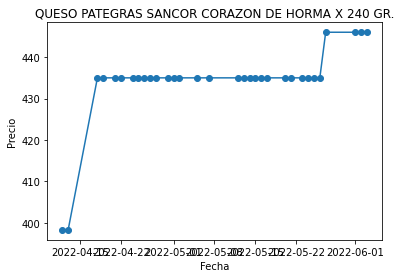

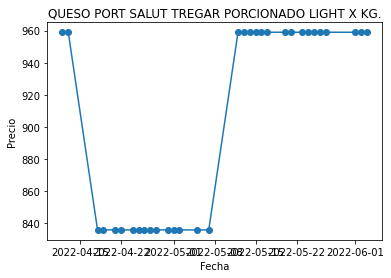

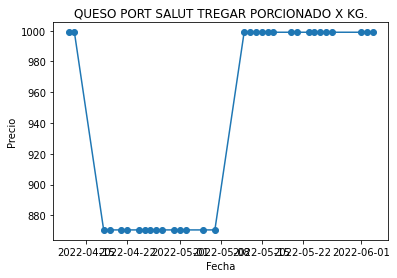

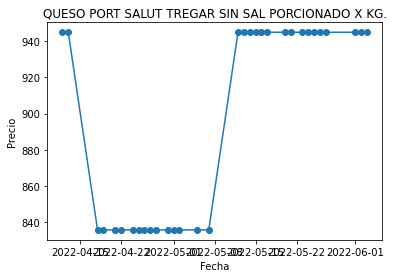

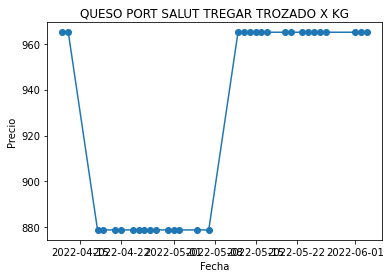

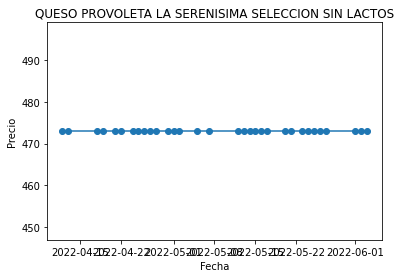

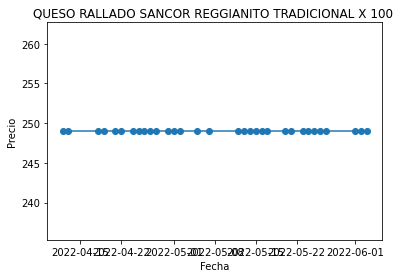

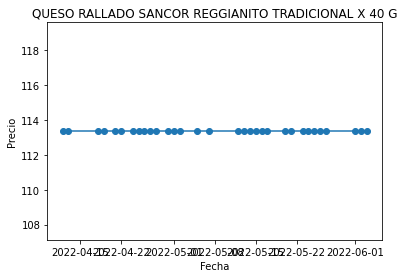

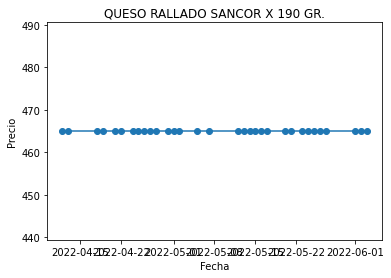

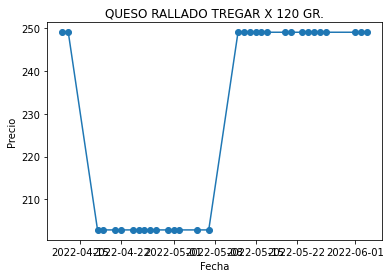

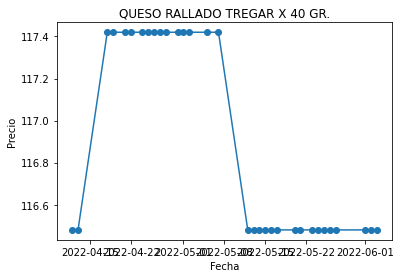

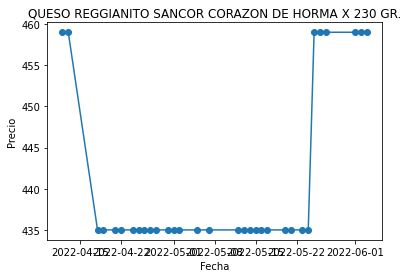

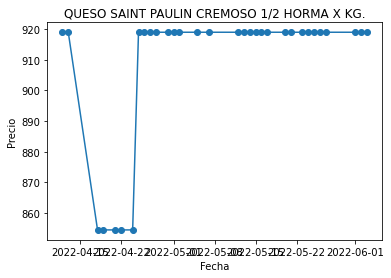

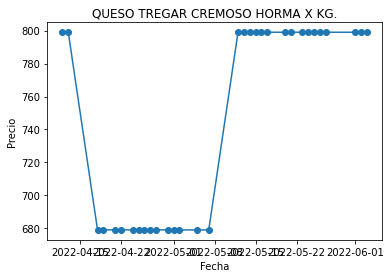

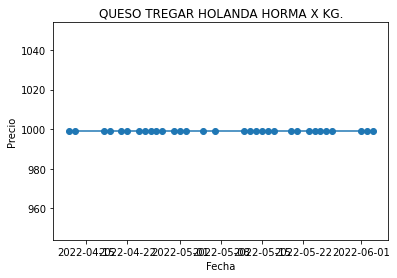

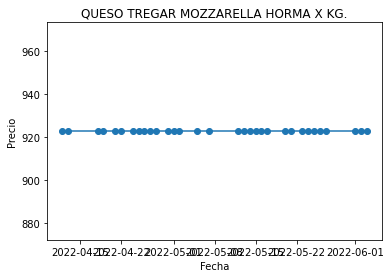

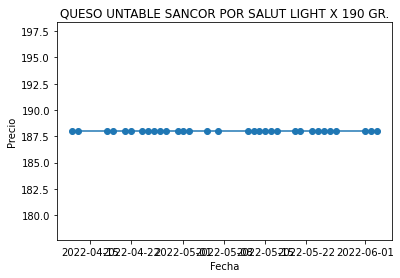

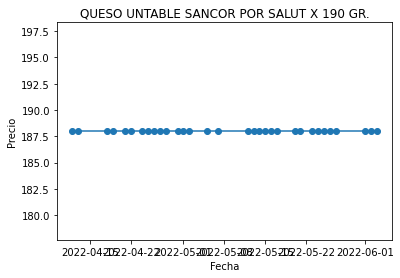

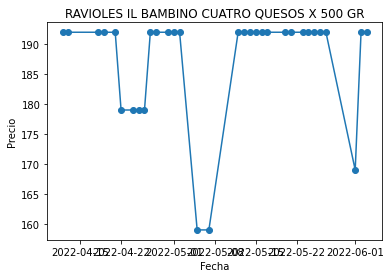

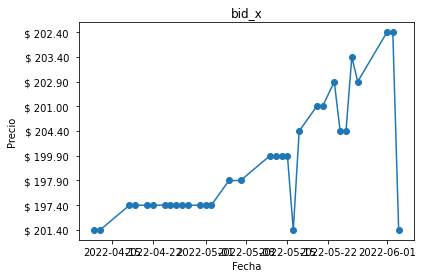

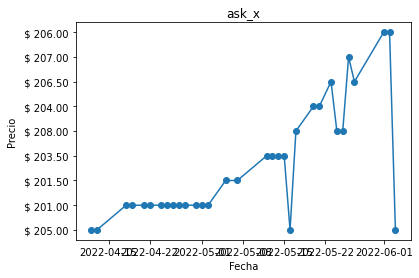

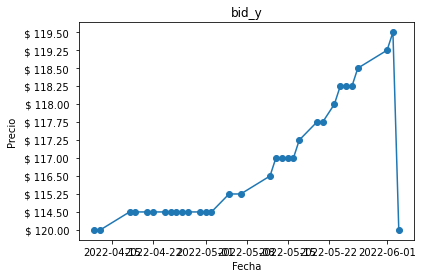

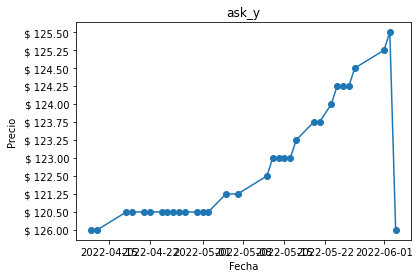

In [ ]:
# Import Library

import matplotlib.pyplot as plt

# Plot
for indice in nuevas_columnas:
    

    plt.plot(matriz_con_dolar[indice], marker='o')

    # Labelling 

    plt.xlabel("Fecha")
    plt.ylabel("Precio")
    plt.title(indice)

    # Display

    plt.show()